#### Pradyumna Maydeo - 11

#### Import Pandas

In [19]:
import pandas as pd
import numpy as np

data=pd.read_csv(r"C:\Users\91721\Desktop\archive\airquality.csv")
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,low
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,high
149,NaN,145.0,13.2,77,9,27,low
150,14.0,191.0,14.3,75,9,28,medium
151,18.0,131.0,8.0,76,9,29,medium


#### checking for unclean data

In [20]:
data.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity     5
dtype: int64

#### cleaning Ozone  

In [21]:
OzoneMean=data["Ozone"].mean()
data["Ozone"].fillna(OzoneMean, inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.0,7.4,67,5,1,high
1,36.00000,118.0,8.0,72,5,2,low
2,12.00000,149.0,12.6,74,5,3,low
3,18.00000,313.0,11.5,62,5,4,medium
4,42.12931,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.00000,193.0,6.9,70,9,26,high
149,42.12931,145.0,13.2,77,9,27,low
150,14.00000,191.0,14.3,75,9,28,medium
151,18.00000,131.0,8.0,76,9,29,medium


#### cleaning solar.R

In [22]:
SolarMean=data["Solar.R"].mean()
data["Solar.R"].fillna(SolarMean, inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,high
1,36.00000,118.000000,8.0,72,5,2,low
2,12.00000,149.000000,12.6,74,5,3,low
3,18.00000,313.000000,11.5,62,5,4,medium
4,42.12931,185.931507,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high
149,42.12931,145.000000,13.2,77,9,27,low
150,14.00000,191.000000,14.3,75,9,28,medium
151,18.00000,131.000000,8.0,76,9,29,medium


In [23]:
HumidityMode=data["Humidity"].mode()
HumidityMode

0    low
Name: Humidity, dtype: object

#### cleaning Humidity

In [24]:
data["Humidity"].replace({np.NaN:"HumidityMode"},inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,high
1,36.00000,118.000000,8.0,72,5,2,low
2,12.00000,149.000000,12.6,74,5,3,low
3,18.00000,313.000000,11.5,62,5,4,medium
4,42.12931,185.931507,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high
149,42.12931,145.000000,13.2,77,9,27,low
150,14.00000,191.000000,14.3,75,9,28,medium
151,18.00000,131.000000,8.0,76,9,29,medium


In [25]:
data1=data
data2=data

#### Label Encoding

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data1['Humidity'] = label_encoder.fit_transform(data1['Humidity'])
data1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,4
3,18.00000,313.000000,11.5,62,5,4,6
4,42.12931,185.931507,14.3,56,5,5,4
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,1
149,42.12931,145.000000,13.2,77,9,27,3
150,14.00000,191.000000,14.3,75,9,28,5
151,18.00000,131.000000,8.0,76,9,29,5


In [37]:
data2['Humidity'].unique()

array([1, 3, 4, 6, 2, 5, 0], dtype=int8)

#### one hot encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder 
data2['Humidity'] = data2['Humidity'].astype('category') 
# data2['Humidity'] = data2['Humidity'].cat.codes
one_hot_encoder = OneHotEncoder()

enc_data = pd.DataFrame(one_hot_encoder.fit_transform(data2[['Humidity']]).toarray()) 

new_data = data2.join(enc_data)
new_data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity,0,1,2,3,4,5,6
0,41.00000,190.000000,7.4,67,5,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36.00000,118.000000,8.0,72,5,2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12.00000,149.000000,12.6,74,5,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,18.00000,313.000000,11.5,62,5,4,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42.12931,185.931507,14.3,56,5,5,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149,42.12931,145.000000,13.2,77,9,27,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150,14.00000,191.000000,14.3,75,9,28,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
151,18.00000,131.000000,8.0,76,9,29,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,0.053575
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,0.186647
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.031063
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,0.102071
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,0.078954
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,-0.123697
Humidity,0.053575,0.186647,-0.031063,0.102071,0.078954,-0.123697,1.000000


#### Model Creation

Text(0.5, 0, 'X')

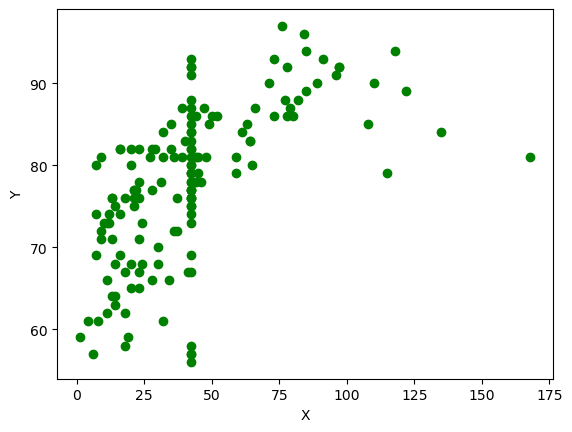

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data['Ozone'], data['Temp'],  color='green')
plt.ylabel("Y")
plt.xlabel("X")

In [31]:
x = data[['Ozone']]
y = data[['Temp']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [32]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
print(model1.coef_)
print( model1.intercept_)


[[0.18953829]]
[69.38883172]


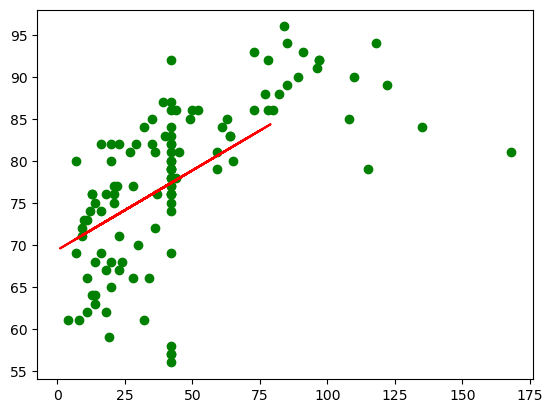

In [33]:
pre = model1.predict(x_test)
plt.plot(x_test,pre,color='red')
plt.scatter(x_train,y_train,  color='green')

In [34]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,pre)

6.542392669833989

In [35]:
metrics.mean_squared_error(y_test,pre)

62.99074002387071

In [36]:
np.sqrt(metrics.mean_squared_error(y_test,pre))

7.936670588091124